In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples,silhouette_score

In [2]:
df=pd.read_csv('bank.csv')

In [3]:
df.head()

,Bank,DD,Withdrawals,Deposits,Branch Area in sqft,avg daily walkins
0,1,227,147,111,2460,639
1,2,123,86,65,3510,436
2,3,306,149,76,2570,669
3,4,251,112,129,3650,623
4,5,174,135,128,3400,579


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515 entries, 0 to 514
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Bank                 515 non-null    int64
 1   DD                   515 non-null    int64
 2   Withdrawals          515 non-null    int64
 3   Deposits             515 non-null    int64
 4   Branch Area in sqft  515 non-null    int64
 5   avg daily walkins    515 non-null    int64
dtypes: int64(6)
memory usage: 24.3 KB


In [5]:
df.isna().sum()

Bank                   0
DD                     0
Withdrawals            0
Deposits               0
Branch Area in sqft    0
avg daily walkins      0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
df=df.drop(['Bank'],axis=1)

In [9]:
d=StandardScaler()

In [10]:
scaled_df=d.fit_transform(df)

In [11]:
model=KMeans(n_clusters=3)

In [12]:
model.fit(scaled_df)

KMeans(n_clusters=3)

In [13]:
#model.labels_

In [14]:
model.inertia_

1593.8960657341067

In [15]:
model=KMeans(n_clusters=4)
model.fit(scaled_df)
model.inertia_

1376.930924004366

In [16]:
wss=[]

In [17]:
for i in range(1,11):
    km=KMeans(n_clusters=i)
    km.fit(scaled_df)
    wss.append(km.inertia_ )

C:\Users\sahil\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


In [18]:
wss

[2575.0,
 1943.5103361838687,
 1593.9117853167754,
 1375.404517124812,
 1220.74931510138,
 1113.9394854815114,
 1022.5029691733594,
 942.9985821293791,
 883.5339147502197,
 839.0721381223049]

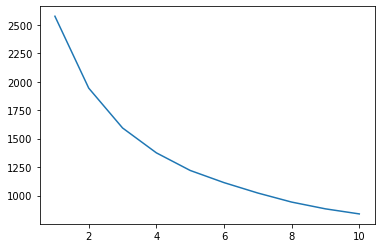

In [19]:
plt.plot(range(1,11),wss)

In [20]:
model=KMeans(n_clusters=3)
model.fit(scaled_df)
label=model.labels_
silhouette_score(df,label)

0.041379572535874536

In [21]:
model=KMeans(n_clusters=4)
model.fit(scaled_df)
label=model.labels_
silhouette_score(df,label)

0.021271813173822984

In [22]:
df["lebels"]=label

In [23]:
df.head()

,DD,Withdrawals,Deposits,Branch Area in sqft,avg daily walkins,lebels
0,227,147,111,2460,639,1
1,123,86,65,3510,436,0
2,306,149,76,2570,669,1
3,251,112,129,3650,623,2
4,174,135,128,3400,579,0


In [24]:
df.lebels.value_counts()

3    149
2    140
1    129
0     97
Name: lebels, dtype: int64

In [25]:
clusters=df.groupby('lebels').mean()

In [26]:
clusters['freq']=df.lebels.value_counts().sort_index()

In [27]:
clusters

,DD,Withdrawals,Deposits,Branch Area in sqft,avg daily walkins,freq
lebels,,,,,,
0,169.041237,93.865979,97.319588,2995.206186,495.536082,97
1,279.007752,192.031008,89.333333,2589.224806,693.930233,129
2,290.757143,105.842857,72.714286,3117.785714,601.892857,140
3,177.953020,194.040268,73.322148,3022.281879,580.080537,149
